In [3]:
import pandas as pd
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

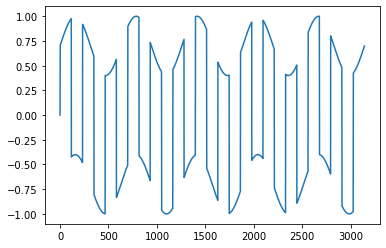

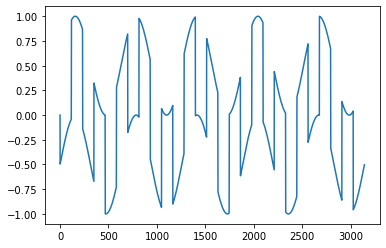

1


In [4]:
x1 = np.loadtxt('./data/dat1.txt',float,'#')
x2 = np.loadtxt('./data/dat2.txt',float,'#')
# x1 = x1 - np.average(x1)
# x2 = x2 -np.average(x2)
plt.plot(x1)
plt.show()
plt.plot(x2)
plt.show()
print(x1.ndim)

In [5]:
z = np.array([x1,x2])
print(z)
print(np.cov(z))

[[ 0.          0.70299995  0.7059996  ...  0.69222291  0.69522224
   0.69822205]
 [ 0.         -0.49500008 -0.49000067 ... -0.51296182 -0.50796293
  -0.50296325]]
[[ 0.53450158 -0.27441811]
 [-0.27441811  0.37447116]]


In [6]:
eig = np.linalg.eig(np.cov(z))
D = eig[0]
E = eig[1]
D = np.sqrt(D)
D = 1/D
V = np.dot(np.dot(E,np.diag(D)),np.transpose(E))
newvar = np.dot(V,z)
print(newvar)
print(np.cov(newvar))

[[ 0.          0.83676875  0.84468437 ...  0.80832981  0.81624458
   0.82416061]
 [ 0.         -0.54899077 -0.53727503 ... -0.59108271 -0.57936821
  -0.56765184]]
[[ 1.00000000e+00 -2.93090395e-16]
 [-2.93090395e-16  1.00000000e+00]]


[0.1819443  0.31903884]


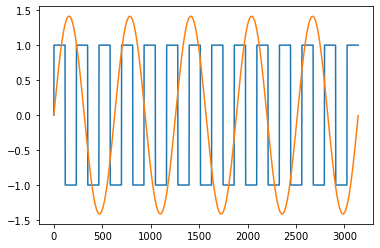

In [10]:
wT = np.array([1,1]) #wの転置を定める
w = wT.T
wT = wT/np.linalg.norm(wT)
b = wT
preW = w
while(1):
  wT = w.T
  tmpw = np.dot(newvar,np.power(np.dot(wT,newvar),3))/3142-3*w
  w = tmpw/np.linalg.norm(tmpw)
  if(np.isclose(w,preW).all() or np.isclose(w*(-1),preW).all()):
    break
  else:
    preW = w
plt.plot(np.dot(w,newvar))
#-------------------------------#
wT = np.array([0.1819443,0.31903884])
print(wT)
w = wT.T
b = wT
preW = w
while(1):
  wT = w.T
  tmpw = np.dot(newvar,np.power(np.dot(wT,newvar),3))/3142-3*w
  w = tmpw/np.linalg.norm(tmpw)
  if(np.isclose(w,preW).all() or np.isclose(w*(-1),preW).all()):
    break
  else:
    preW = w
plt.plot(np.dot(w,newvar))